# Import Libary numpy and pandas

In [764]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mso
import seaborn as sns
sns.set()

# Data loading

#### Get Titanic dataset files

In [765]:
import os
for dirname, _, filenames in os.walk('/project/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/project/data/.DS_Store
/project/data/gender_submission.csv
/project/data/test.csv
/project/data/train.csv
/project/data/.ipynb_checkpoints/dataset-checkpoint.txt


##### Read train.csv file

In [766]:
train_data = pd.read_csv("/project/data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Read test.csv file

In [767]:
#read test.csv file
test_data = pd.read_csv("/project/data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preparation

#### Data Exploration

In [768]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### There are some missed values in 'Age', 'Cabin', and 'Embarked' columns of train dataset

In [769]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### There are some missed values in 'Age', 'Cabin', and 'Fare' columns of test dataset

##### There are 3 types of data types of features in the titanic dataset:
###### 1. Numerical: Age, Fare. 
######        1.1 Discrete: SibSp, Parch.
###### 2. Categorical: Survived, Sex, and Embarked. 
######        2.1 Ordinal: Pclass.
###### 3. Mixed: Cabin

##### Visualize the train dataset 

In [770]:
# function bar chart to get servived or dead
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


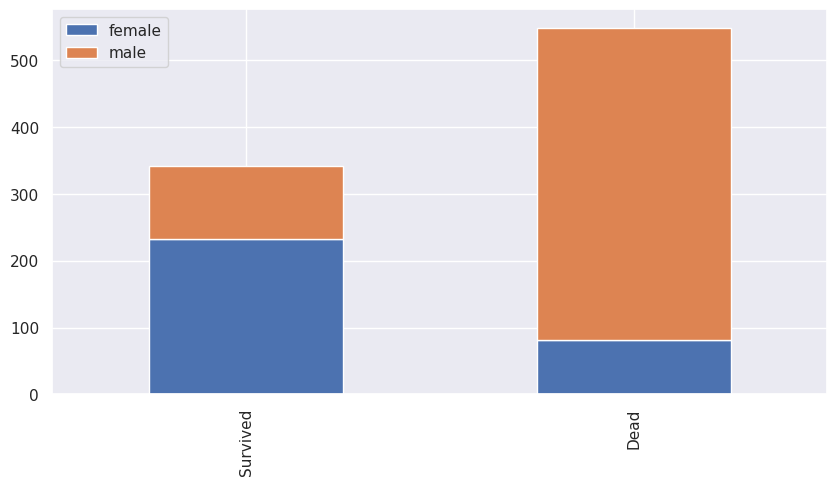

In [771]:
bar_chart('Sex')
print("Survived :\n",train_data[train_data['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['Sex'].value_counts())

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


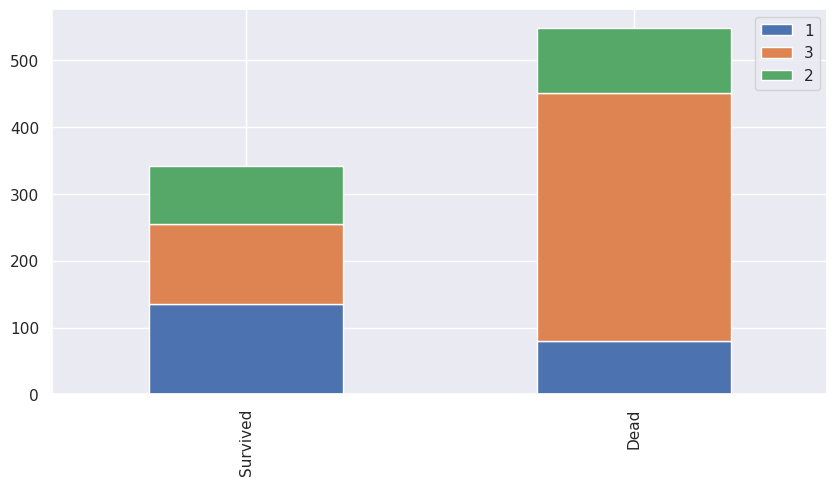

In [772]:
bar_chart('Pclass')
print("Survived :\n",train_data[train_data['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['Pclass'].value_counts())

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


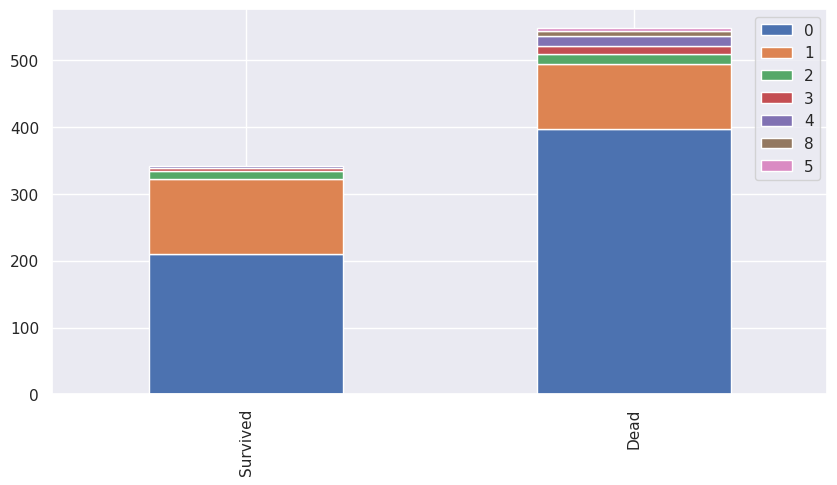

In [773]:
bar_chart('SibSp')
print("Survived :\n",train_data[train_data['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['SibSp'].value_counts())

##### Visualize the test dataset 

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


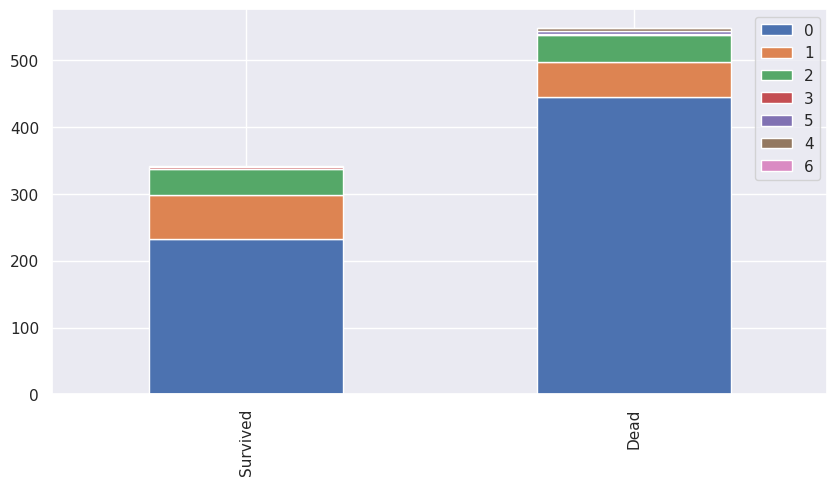

In [774]:
bar_chart('Parch')
print("Survived :\n",train_data[train_data['Survived']==1]['Parch'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['Parch'].value_counts())

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


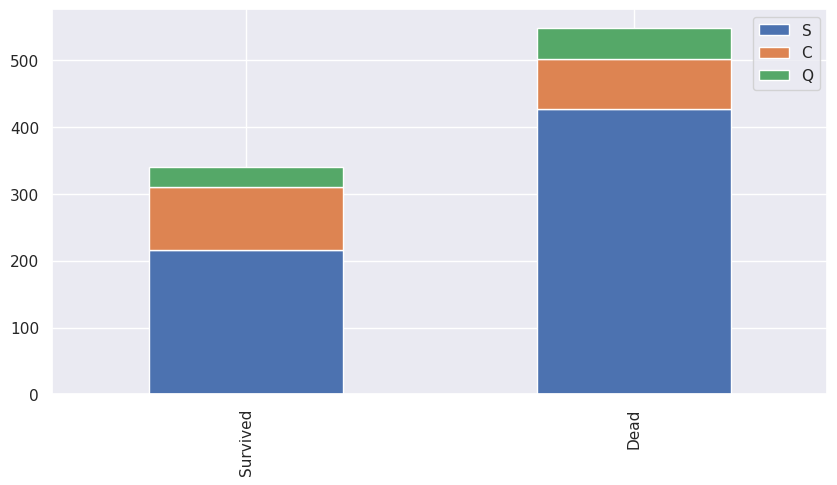

In [775]:
bar_chart('Embarked')
print("Survived :\n",train_data[train_data['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['Embarked'].value_counts())

# Feature engineering

#### combin test and train dataset 

In [776]:
train_test_data = [train_data,test_data]

In [777]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [778]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [779]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [780]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [781]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [782]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [783]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [784]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [785]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [786]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,2


In [787]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [788]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [789]:
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace= True)
test_data["Age"].fillna(test_data.groupby('Title')['Age'].transform("median"), inplace= True)

In [790]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [791]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [792]:
def group_of_age(age):
    if age <= 18:
        return 0
    elif age > 18 and age <= 28:
        return 1
    elif age > 28 and age <= 38:
        return 2
    elif age > 38 and age <= 60:
        return 3
    else:
        return 4 
    
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].apply(group_of_age)

In [793]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,0


In [794]:
Pclass1 = train_data[train_data['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass'] == 3]['Embarked'].value_counts()

In [795]:
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [796]:
for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].fillna('S')

In [797]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [798]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [799]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,0


In [800]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

In [801]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,0,1


In [802]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,0,2,2
2,894,2,"Myles, Mr. Thomas Francis",0,4,0,0,240276,9.6875,NaN,2,0,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,2,3


In [803]:
test = test_data.drop(['Name','Ticket','Fare','SibSp','Parch','Cabin'],axis=1)
train = train_data.drop(['PassengerId','Name','SibSp','Parch','Cabin','Ticket','Fare'], axis=1)

In [804]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,FamilySize
0,0,3,0,1,0,0,2
1,1,1,1,2,1,2,2
2,1,3,1,1,0,1,1
3,1,1,1,2,0,2,2
4,0,3,0,2,0,0,1


In [805]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,FamilySize
0,892,3,0,2,2,0,1
1,893,3,1,3,0,2,2
2,894,2,0,4,2,0,1
3,895,3,0,1,0,0,1
4,896,3,1,1,0,2,3


In [806]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Sex         891 non-null    int64
 3   Age         891 non-null    int64
 4   Embarked    891 non-null    int64
 5   Title       891 non-null    int64
 6   FamilySize  891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


In [807]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   Embarked     418 non-null    int64
 5   Title        418 non-null    int64
 6   FamilySize   418 non-null    int64
dtypes: int64(7)
memory usage: 23.0 KB


In [808]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [809]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [810]:
train_data = train.drop('Survived', axis = 1)
target = train['Survived']

In [811]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pclass      891 non-null    int64
 1   Sex         891 non-null    int64
 2   Age         891 non-null    int64
 3   Embarked    891 non-null    int64
 4   Title       891 non-null    int64
 5   FamilySize  891 non-null    int64
dtypes: int64(6)
memory usage: 41.9 KB


In [812]:
train_data.head()

,Pclass,Sex,Age,Embarked,Title,FamilySize
0,3,0,1,0,0,2
1,1,1,2,1,2,2
2,3,1,1,0,1,1
3,1,1,2,0,2,2
4,3,0,2,0,0,1


# Model

In [813]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [814]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Sex         891 non-null    int64
 3   Age         891 non-null    int64
 4   Embarked    891 non-null    int64
 5   Title       891 non-null    int64
 6   FamilySize  891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


# Cross Validation(k-fold)

In [815]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [816]:
clf = [
       KNeighborsClassifier(n_neighbors = 13),
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),
       GaussianNB(),
       SVC(),
       ExtraTreeClassifier(),
       GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),
       AdaBoostClassifier(),
       ExtraTreesClassifier()
      ]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
model_fit()

Score of Model 0 : 81.14
Score of Model 1 : 78.45
Score of Model 2 : 79.24
Score of Model 3 : 81.82
Score of Model 4 : 82.83
Score of Model 5 : 78.79
Score of Model 6 : 82.6
Score of Model 7 : 81.14
Score of Model 8 : 78.57


# Test 

In [817]:
clf1 = SVC()
clf1.fit(train_data, target)

SVC()

In [818]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,FamilySize
0,892,3,0,2,2,0,1
1,893,3,1,3,0,2,2
2,894,2,0,4,2,0,1
3,895,3,0,1,0,0,1
4,896,3,1,1,0,2,3


In [819]:
test_data = test.drop(['PassengerId'], axis=1)


In [820]:
test_data.head()

,Pclass,Sex,Age,Embarked,Title,FamilySize
0,3,0,2,2,0,1
1,3,1,3,0,2,2
2,2,0,4,2,0,1
3,3,0,1,0,0,1
4,3,1,1,0,2,3


In [821]:
prediction = clf1.predict(test_data)

In [830]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [831]:
len(prediction)

418

In [822]:
test_data_sample = pd.read_csv('/project/data/test.csv')
test_data_sample["Survived"] = prediction

In [823]:
test_data_sample[['PassengerId','Survived']].to_csv("submission-solution-2.csv", index = False)